# Visualizing

Ok, now that we know how to make a lens system of our choosing, lets spend some time actually looking at what is going on. 

In [1]:
%matplotlib notebook
import sys
sys.path.append("../")
from ripple.lens import SIE_Lens
from ripple.source import Gaussian_Source
from ripple.plane import ImagePlane, LensPlane, SourcePlane
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["image.cmap"] = "inferno"
import numpy as np

## Caustics and critical lines

The simplest way to visualize what is going on with a lens system is to include the caustics and critical lines. Ripple has built in plotting functions for these, simply pass the lens plane and axis object to the functions and they will add the lines to the plot. Blue is caustics and red is critical lines. You can pass extra parameters to the functions in order to control the plotting behaviour.

In [2]:
from ripple.plot import critical_lines, caustics

<IPython.core.display.Javascript object>


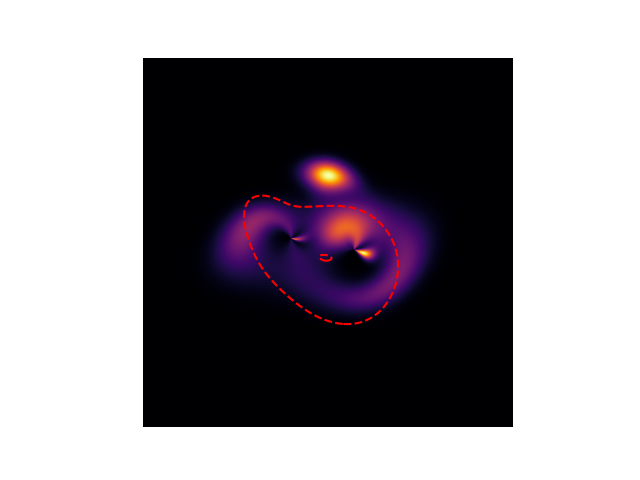

In [18]:
SIE1 = SIE_Lens(x0 = -1, y0 = 0.1, q = 0.5, pa = -np.pi/4, core = 0.1)
SIE2 = SIE_Lens(x0 = 0.7, y0 = -0.2, q = 0.9, core = 0.)
GS1 = Gaussian_Source(x0 = -0.1, y0 = -0.1, q = 0.5, pa = np.pi/3, sigma = 0.3)
GS2 = Gaussian_Source(x0 = -0.7, y0 = 0.7, sigma = 0.2)

IP = ImagePlane(shape = (1000,1000), fov = 10)
LP = LensPlane([SIE1, SIE2])
SP = SourcePlane([GS1, GS2])

fig, ax = plt.subplots()
ax.imshow(IP.image(LP, SP), extent = IP.plt_extent, origin = "lower")
critical_lines(LP, ax)
#caustics(LP, ax)
ax.axis("off")
plt.show()

Now lets look at the source image. There isn't anything special here, the source image simply shows the light at is would have reached us with no lens.

In [5]:
from ripple.plot import source_distribution

<IPython.core.display.Javascript object>


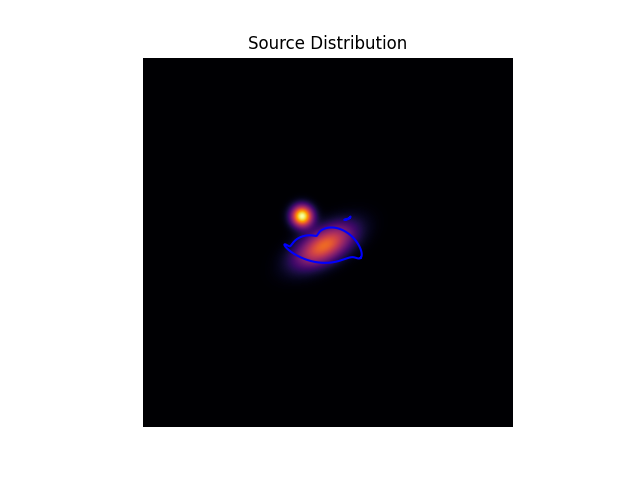

In [6]:
fig, ax = plt.subplots()
source_distribution(SP, ax)
caustics(LP, ax)
ax.axis("off")
plt.show()

## Viewing details of a lens plane

While it is quite straightforward, another way to get a sense of the lensing system is to view the individual planes involved one at a time. Lets look at the lens plane and see what is going on. Using the built in functions is very simple, though they are really just meant for quick diagnostics.Note that the kappa map is shown in log scale and the gamma maps are shown with arctan scaling.

In [7]:
from ripple.plot import lens_potential, lens_kappa, lens_alpha, lens_gamma

<IPython.core.display.Javascript object>


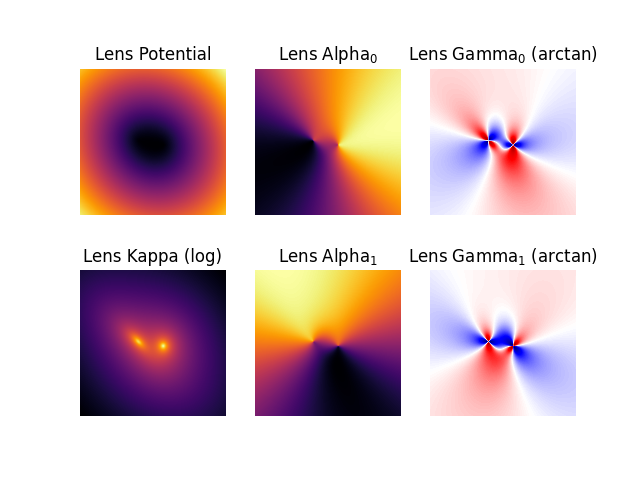

In [8]:
fig, axarr = plt.subplots(2,3)
lens_potential(LP, axarr[0][0])
lens_kappa(LP, axarr[1][0])
lens_alpha(LP, axarr[0][1], axarr[1][1])
lens_gamma(LP, axarr[0][2], axarr[1][2])
for ax in axarr.ravel():
    ax.axis("off")
plt.show()

## Rays in 3D

A lensing system is ultimately a 3D system, sometimes it helps to look at it in 3D to see what is going on. 

In [9]:
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
from ripple.plot import rays_3D

<IPython.core.display.Javascript object>


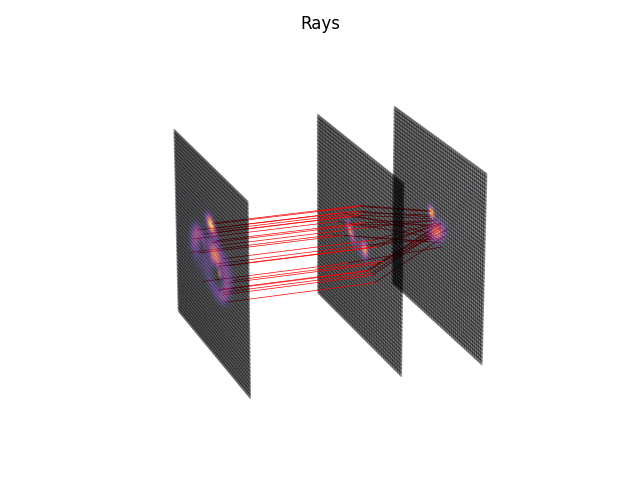

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')

samplesX, samplesY, finalX, finalY = rays_3D(IP, LP, SP, ax)
ax.axis("off")
plt.tight_layout()
plt.show()

It is worth adding a note about the geometry of this figure. The three planes are presented as being the same size, this is true for angular coordinates. In the absense of a deflector, the red lines would travel straight from one image to the next (as can be seen between the image and lens planes). In fact the angled lines between the lens and the source are fictitious, they should also be straight parallel lines that have been discontinuously shifted to the position where they end up in the source plane. This doesn't make for a very good visual though, so we have projected the rays at an angle. Below is a copy of the plot but properly represented. 

<IPython.core.display.Javascript object>


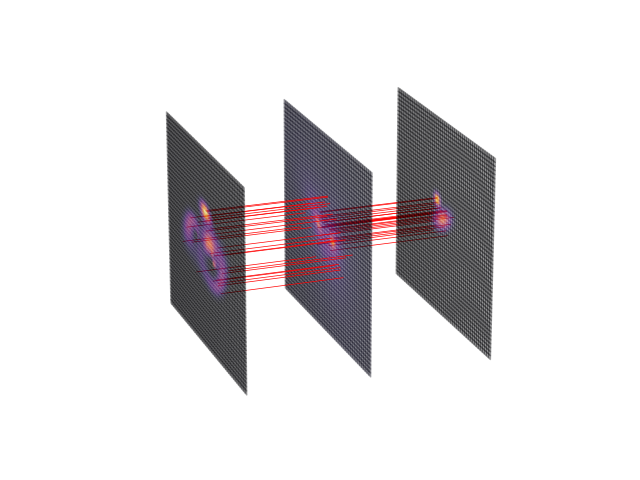

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

surface_kwargs = {"shade": True, "alpha": 0.3}
image = IP.image(LP,SP)
kappa = LP.kappa(IP.XX, IP.YY)
source = SP(IP.XX, IP.YY)
ax.plot_surface(IP.XX, np.zeros(image.shape), IP.YY, facecolors = mpl.cm.inferno(image/np.max(image)), zorder = 5, **surface_kwargs)
ax.plot_surface(IP.XX, np.zeros(image.shape)+1, IP.YY, facecolors = mpl.cm.inferno(kappa/np.max(kappa)), zorder = 3, **surface_kwargs)
ax.plot_surface(IP.XX, np.zeros(image.shape)+2, IP.YY, facecolors = mpl.cm.inferno(source/np.max(source)), zorder = 1, **surface_kwargs)
for i in range(len(samplesX)):
    ax.plot3D([samplesX[i],samplesX[i]], [0,1],[samplesY[i],samplesY[i]], color = "r", linewidth = 0.5, zorder = 4)
    ax.plot3D([finalX[i],finalX[i]], [1,2],[finalY[i],finalY[i]], color = "r", linewidth = 0.5, zorder = 2)
ax.axis("off")
plt.tight_layout()
ax.view_init(20, -20)
plt.show()

This figure is not as nice to look at, but it makes it clear that the lens is being treated as a thin system over the scale of the light paths and that the units of the image planes is anglular units. To treat the system more accurately where you could see the change in angles we would have to put everything in physical units. The image plane would condense to a single point, the lens plane would also become considerably smaller than the source plane. Below we have made an example of what this would look like where we use x = theta*D.

<IPython.core.display.Javascript object>


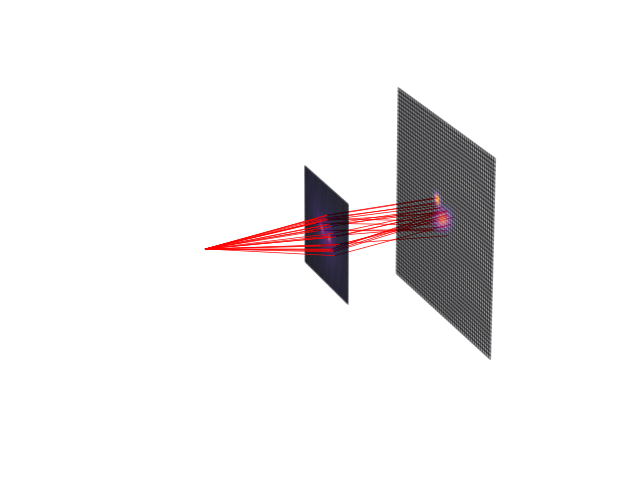

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

surface_kwargs = {"shade": True, "alpha": 0.3}
ax.plot_surface(IP.XX*LP.z, np.zeros(image.shape)+LP.z, IP.YY*LP.z, facecolors = mpl.cm.inferno(kappa/np.max(kappa)), zorder = 3, **surface_kwargs)
ax.plot_surface(IP.XX*SP.z, np.zeros(image.shape)+SP.z, IP.YY*SP.z, facecolors = mpl.cm.inferno(source/np.max(source)), zorder = 1, **surface_kwargs)
for i in range(len(samplesX)):
    ax.plot3D([0,samplesX[i]*LP.z], [0,LP.z],[0,samplesY[i]*LP.z], color = "r", linewidth = 0.5, zorder = 4)
    ax.plot3D([samplesX[i]*LP.z,finalX[i]*SP.z], [LP.z,SP.z],[samplesY[i]*LP.z,finalY[i]*SP.z], color = "r", linewidth = 0.5, zorder = 2)
ax.axis("off")
plt.tight_layout()
ax.view_init(20, -20)
plt.show()

That is an approximation to what is going on with the light rays. Though to be precise we would need to convert the redshifts into angular diameter distances to scale the lens/source planes appropriately. In our universe the notions of distance and size are somewhat fuzzy on large scales. Below we have done just that, since every ripple object subclasses "Universe" they can all compute "proper" distance metrics for a given cosmology.

<IPython.core.display.Javascript object>


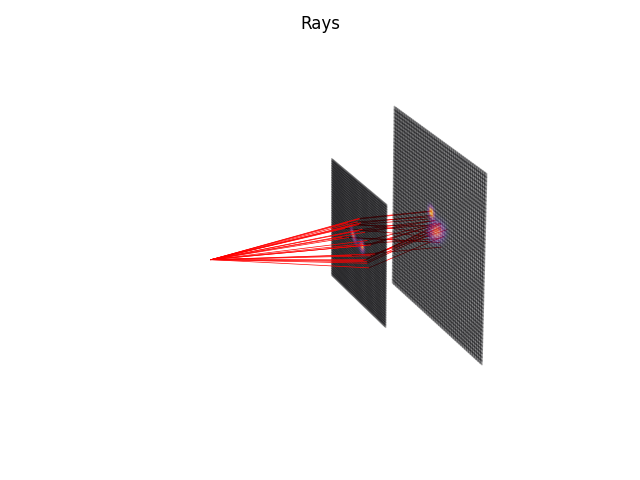

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

rays_3D(IP, LP, SP, ax, units = "physical", samples = (samplesX, samplesY))
ax.axis("off")
plt.tight_layout()
plt.show()

This figure is about the closest we'll get to visualizing what is going on with the light rays (modulo scaling the figure significantly on the distance axis). Hopefully this helps you picture what is going on as you carry forward to learn more about lensing!

## Multiplane lensing visualization

The story gets a lot more complicated in the multiplane lensing formalism. Still we can get a feel for what is going on by projecting a few rays from the image to see their path. To see the complexity of multiplane lenses, we will take the same two SIEs from before and separate them into two lensing planes.

In [22]:
from ripple.plot import rays_3D_multiplane
from ripple.plane import MultiLensPlane

<IPython.core.display.Javascript object>


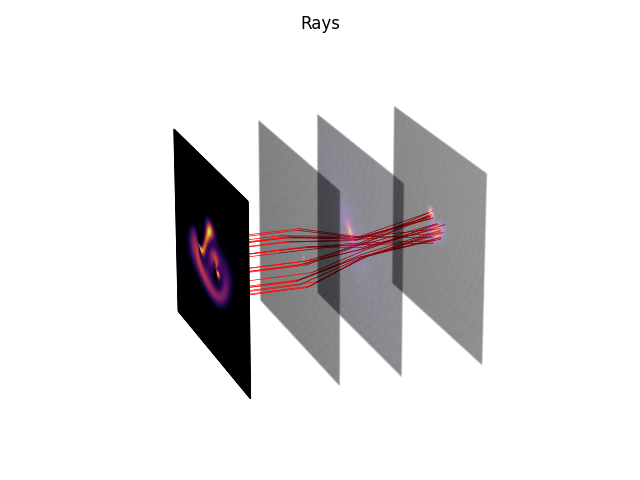

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')

LP1 = LensPlane([SIE1], z = 1.0)
LP2 = LensPlane([SIE2], z = 0.5)
MLP = MultiLensPlane([LP1, LP2]) 

rays_3D_multiplane(IP, MLP, SP, ax, units = "angular")
ax.axis("off")
plt.tight_layout()
plt.show()

Keep in mind that everything should be stretched significantly in the distance axis. The very sharp changes in angle that the rays make at each plane are actually very subtle shifts by an arcsec or so, but they look big on the scale of an image that is just a few arcsec across. Just as before, we can also put things into more physical units with proper relative distances accounted for in our particular cosmological setting.

<IPython.core.display.Javascript object>


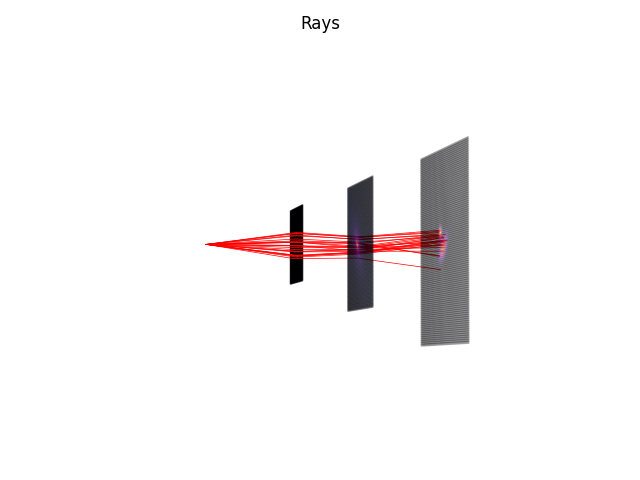

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
rays_3D_multiplane(IP, MLP, SP, ax, units = "physical")
ax.axis("off")
plt.tight_layout()
plt.show()